# YOLO v7

## YOLO v7 다운로드

In [ ]:
# Download YOLOv7 repository and install requirements
!git clone https://github.com/WongKinYiu/yolov7
%cd yolov7
!pip install -r requirements.txt

In [ ]:
# download COCO starting checkpoint
%cd /content/yolov7
!wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7_training.pt

## 데이터셋 다운로드

In [ ]:
# https://universe.roboflow.com/brad-dwyer/pklot-1tros/dataset/4
# https://universe.roboflow.com/bouakkaz144-lotfi-gmail-com/pfe-8ydlj (추천)

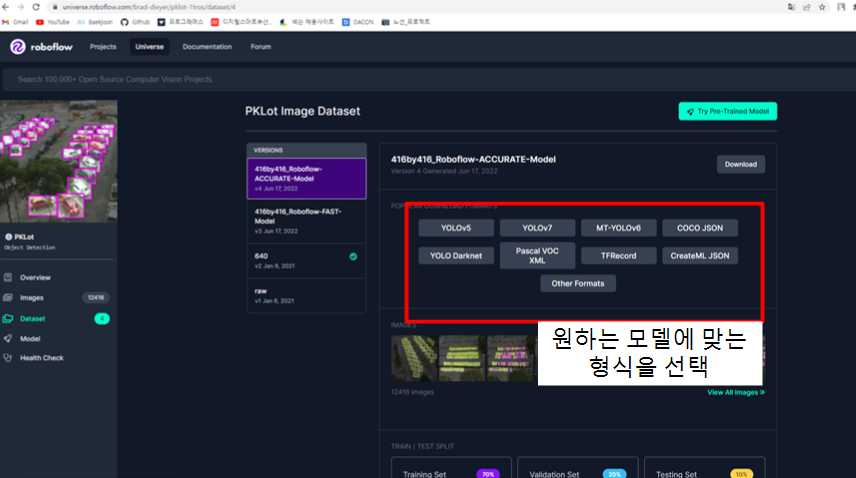

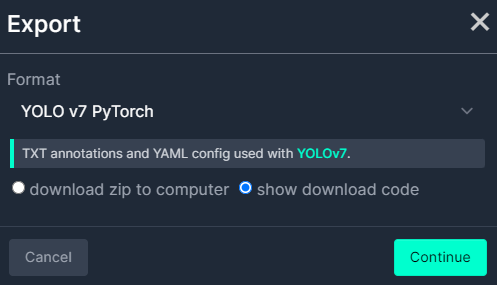
### download zip to computer
* 장점
  * 데이터를 한번만 다운 받은 후 구글 드라이브에 업로드하여 사용함
  * 한번만 다운하면 다음부턴 같은 과정을 거치지 않아도 됨
* 단점
  * 데이터셋의 용량에 따라 다운받는 시간과 구글 드라이브에 업로드하는 시간이 많이 걸림

### show download code
* 장점
  * 코드를 통해서 다운 받으므로 드라이브 및 컴퓨터 용량을 차지하지 않음
* 단점
  * 런타임에 연결할 때 마다 코드를 실행시켜 줘야함
  * 용량에 따라 실행시간이 오래걸림

### show download code를 선택했을 경우
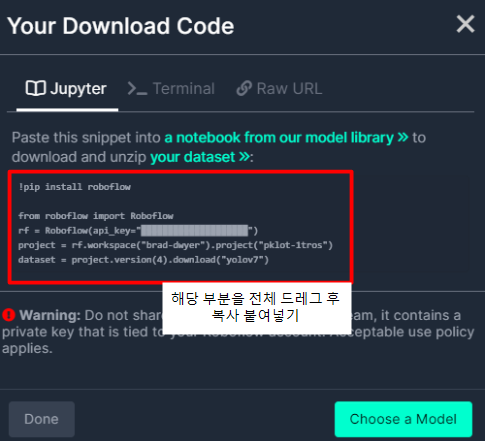

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Your APIKEY")
project = rf.workspace("brad-dwyer").project("pklot-1tros")
dataset = project.version(4).download("yolov7")

실행을 완료하면 /content/yolov7/PKLot-4 폴더가 추가 되어있음

## YOLO v7 훈련

In [ ]:
# run this cell to begin training
# 명령어와 관련된 정보는 
# https://blog.roboflow.com/yolov7-custom-dataset-training-tutorial/ 
# 에서 확인 가능

%cd /content/yolov7
!python train.py --batch 8 --epochs 1 --data {dataset.location}/data.yaml --weights 'yolov7_training.pt' --device 0

/content/yolov7
YOLOR 🚀 v0.1-113-g8035ee6 torch 1.12.1+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16280.875MB)

Namespace(adam=False, artifact_alias='latest', batch_size=8, bbox_interval=-1, bucket='', cache_images=False, cfg='', data='/content/yolov7/PKLot-4/data.yaml', device='0', entity=None, epochs=1, evolve=False, exist_ok=False, freeze=[0], global_rank=-1, hyp='data/hyp.scratch.p5.yaml', image_weights=False, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='exp', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/exp', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=8, upload_dataset=False, v5_metric=False, weights='yolov7_training.pt', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warm

훈련 결과는 /content/yolov7/runs/train 속에 저장됨  
훈련 코드를 여러번 돌릴 경우 (exp n에 저장됨(n은 정수))

# YOLO v4

In [ ]:
# yolov7 학습할 때 /content/yolov7 에서 진행되었으므로 yolov4를 진행하기전 상위 디렉토리로 이동
%cd /content

/content


## Darknet YOLO v4 다운로드

In [ ]:
#darknet 다운로드
!git clone https://github.com/AlexeyAB/darknet

#darknet 설치
%cd /content/darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!make

#darknet 폴더 사용
!chmod -R +x /content/darknet

#darknet 폴더 조회
!ls -al /content/darknet

In [ ]:
%cd /content
# coco 데이터로 학습된 weight 다운로드
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137

## 데이터셋 다운로드

In [ ]:
%cd /content

/content


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Your APIKEY")
project = rf.workspace("brad-dwyer").project("pklot-1tros")
dataset = project.version(4).download("darknet")

In [ ]:
import glob

# jpg 확장자로 된 모든 파일 읽어오기
image_files = glob.glob('/content/PKLot-4/train/*.jpg')
valid_images = glob.glob('/content/PKLot-4/valid/*.jpg')

In [ ]:
#훈련 이미지 경로 저장
with open('/content/train_img.txt', 'w') as f:
  f.writelines('\n'.join(image_files))

#검증 이미지 경로 저장
with open('/content/valid_img.txt', 'w') as f:
  f.writelines('\n'.join(valid_images))

with open('/content/names.txt', 'w') as f:
  f.writelines('\n'.join(['empty', 'full']))

In [ ]:
!mkdir yolov4_result

pklot_data = \
"""
#전체 클래스 개수
classes = 2
#학습 이미지의 경로가 저장된 파일 경로
train = /content/train_img.txt
#테스트 이미지 경로가 저장된 파일 경로
valid = /content/valid_img.txt
#클래스명이 저장된 파일 경로
names = /content/names.txt
#학습한 weight가 저장될 경로
backup = /content/yolov4_result
"""

with open('/content/pklot_data.txt', 'w') as f:
  f.writelines(pklot_data)

#### config text (웬만하면 접고 열지마세요.)

In [ ]:
cfg = \
"""
[net]
batch=8
subdivisions=8
# Training
#width=512
#height=512
width=608
height=608
channels=3
momentum=0.949
decay=0.0005
angle=0
saturation = 1.5
exposure = 1.5
hue=.1

learning_rate=0.0013
burn_in=1000
max_batches = 100
policy=steps
steps=80,90
scales=.1,.1

#cutmix=1
mosaic=1

#:104x104 54:52x52 85:26x26 104:13x13 for 416

[convolutional]
batch_normalize=1
filters=32
size=3
stride=1
pad=1
activation=mish

# Downsample

[convolutional]
batch_normalize=1
filters=64
size=3
stride=2
pad=1
activation=mish

[convolutional]
batch_normalize=1
filters=64
size=1
stride=1
pad=1
activation=mish

[route]
layers = -2

[convolutional]
batch_normalize=1
filters=64
size=1
stride=1
pad=1
activation=mish

[convolutional]
batch_normalize=1
filters=32
size=1
stride=1
pad=1
activation=mish

[convolutional]
batch_normalize=1
filters=64
size=3
stride=1
pad=1
activation=mish

[shortcut]
from=-3
activation=linear

[convolutional]
batch_normalize=1
filters=64
size=1
stride=1
pad=1
activation=mish

[route]
layers = -1,-7

[convolutional]
batch_normalize=1
filters=64
size=1
stride=1
pad=1
activation=mish

# Downsample

[convolutional]
batch_normalize=1
filters=128
size=3
stride=2
pad=1
activation=mish

[convolutional]
batch_normalize=1
filters=64
size=1
stride=1
pad=1
activation=mish

[route]
layers = -2

[convolutional]
batch_normalize=1
filters=64
size=1
stride=1
pad=1
activation=mish

[convolutional]
batch_normalize=1
filters=64
size=1
stride=1
pad=1
activation=mish

[convolutional]
batch_normalize=1
filters=64
size=3
stride=1
pad=1
activation=mish

[shortcut]
from=-3
activation=linear

[convolutional]
batch_normalize=1
filters=64
size=1
stride=1
pad=1
activation=mish

[convolutional]
batch_normalize=1
filters=64
size=3
stride=1
pad=1
activation=mish

[shortcut]
from=-3
activation=linear

[convolutional]
batch_normalize=1
filters=64
size=1
stride=1
pad=1
activation=mish

[route]
layers = -1,-10

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=mish

# Downsample

[convolutional]
batch_normalize=1
filters=256
size=3
stride=2
pad=1
activation=mish

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=mish

[route]
layers = -2

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=mish

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=mish

[convolutional]
batch_normalize=1
filters=128
size=3
stride=1
pad=1
activation=mish

[shortcut]
from=-3
activation=linear

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=mish

[convolutional]
batch_normalize=1
filters=128
size=3
stride=1
pad=1
activation=mish

[shortcut]
from=-3
activation=linear

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=mish

[convolutional]
batch_normalize=1
filters=128
size=3
stride=1
pad=1
activation=mish

[shortcut]
from=-3
activation=linear

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=mish

[convolutional]
batch_normalize=1
filters=128
size=3
stride=1
pad=1
activation=mish

[shortcut]
from=-3
activation=linear


[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=mish

[convolutional]
batch_normalize=1
filters=128
size=3
stride=1
pad=1
activation=mish

[shortcut]
from=-3
activation=linear

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=mish

[convolutional]
batch_normalize=1
filters=128
size=3
stride=1
pad=1
activation=mish

[shortcut]
from=-3
activation=linear

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=mish

[convolutional]
batch_normalize=1
filters=128
size=3
stride=1
pad=1
activation=mish

[shortcut]
from=-3
activation=linear

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=mish

[convolutional]
batch_normalize=1
filters=128
size=3
stride=1
pad=1
activation=mish

[shortcut]
from=-3
activation=linear

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=mish

[route]
layers = -1,-28

[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=mish

# Downsample

[convolutional]
batch_normalize=1
filters=512
size=3
stride=2
pad=1
activation=mish

[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=mish

[route]
layers = -2

[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=mish

[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=mish

[convolutional]
batch_normalize=1
filters=256
size=3
stride=1
pad=1
activation=mish

[shortcut]
from=-3
activation=linear


[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=mish

[convolutional]
batch_normalize=1
filters=256
size=3
stride=1
pad=1
activation=mish

[shortcut]
from=-3
activation=linear


[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=mish

[convolutional]
batch_normalize=1
filters=256
size=3
stride=1
pad=1
activation=mish

[shortcut]
from=-3
activation=linear


[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=mish

[convolutional]
batch_normalize=1
filters=256
size=3
stride=1
pad=1
activation=mish

[shortcut]
from=-3
activation=linear


[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=mish

[convolutional]
batch_normalize=1
filters=256
size=3
stride=1
pad=1
activation=mish

[shortcut]
from=-3
activation=linear


[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=mish

[convolutional]
batch_normalize=1
filters=256
size=3
stride=1
pad=1
activation=mish

[shortcut]
from=-3
activation=linear


[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=mish

[convolutional]
batch_normalize=1
filters=256
size=3
stride=1
pad=1
activation=mish

[shortcut]
from=-3
activation=linear

[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=mish

[convolutional]
batch_normalize=1
filters=256
size=3
stride=1
pad=1
activation=mish

[shortcut]
from=-3
activation=linear

[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=mish

[route]
layers = -1,-28

[convolutional]
batch_normalize=1
filters=512
size=1
stride=1
pad=1
activation=mish

# Downsample

[convolutional]
batch_normalize=1
filters=1024
size=3
stride=2
pad=1
activation=mish

[convolutional]
batch_normalize=1
filters=512
size=1
stride=1
pad=1
activation=mish

[route]
layers = -2

[convolutional]
batch_normalize=1
filters=512
size=1
stride=1
pad=1
activation=mish

[convolutional]
batch_normalize=1
filters=512
size=1
stride=1
pad=1
activation=mish

[convolutional]
batch_normalize=1
filters=512
size=3
stride=1
pad=1
activation=mish

[shortcut]
from=-3
activation=linear

[convolutional]
batch_normalize=1
filters=512
size=1
stride=1
pad=1
activation=mish

[convolutional]
batch_normalize=1
filters=512
size=3
stride=1
pad=1
activation=mish

[shortcut]
from=-3
activation=linear

[convolutional]
batch_normalize=1
filters=512
size=1
stride=1
pad=1
activation=mish

[convolutional]
batch_normalize=1
filters=512
size=3
stride=1
pad=1
activation=mish

[shortcut]
from=-3
activation=linear

[convolutional]
batch_normalize=1
filters=512
size=1
stride=1
pad=1
activation=mish

[convolutional]
batch_normalize=1
filters=512
size=3
stride=1
pad=1
activation=mish

[shortcut]
from=-3
activation=linear

[convolutional]
batch_normalize=1
filters=512
size=1
stride=1
pad=1
activation=mish

[route]
layers = -1,-16

[convolutional]
batch_normalize=1
filters=1024
size=1
stride=1
pad=1
activation=mish

##########################

[convolutional]
batch_normalize=1
filters=512
size=1
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=1
size=3
stride=1
pad=1
filters=1024
activation=leaky

[convolutional]
batch_normalize=1
filters=512
size=1
stride=1
pad=1
activation=leaky

### SPP ###
[maxpool]
stride=1
size=5

[route]
layers=-2

[maxpool]
stride=1
size=9

[route]
layers=-4

[maxpool]
stride=1
size=13

[route]
layers=-1,-3,-5,-6
### End SPP ###

[convolutional]
batch_normalize=1
filters=512
size=1
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=1
size=3
stride=1
pad=1
filters=1024
activation=leaky

[convolutional]
batch_normalize=1
filters=512
size=1
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=leaky

[upsample]
stride=2

[route]
layers = 85

[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=leaky

[route]
layers = -1, -3

[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=1
size=3
stride=1
pad=1
filters=512
activation=leaky

[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=1
size=3
stride=1
pad=1
filters=512
activation=leaky

[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=leaky

[upsample]
stride=2

[route]
layers = 54

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=leaky

[route]
layers = -1, -3

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=1
size=3
stride=1
pad=1
filters=256
activation=leaky

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=1
size=3
stride=1
pad=1
filters=256
activation=leaky

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=leaky

##########################

[convolutional]
batch_normalize=1
size=3
stride=1
pad=1
filters=256
activation=leaky

[convolutional]
size=1
stride=1
pad=1
filters=21
activation=linear


[yolo]
mask = 0,1,2
anchors = 12, 16, 19, 36, 40, 28, 36, 75, 76, 55, 72, 146, 142, 110, 192, 243, 459, 401
classes=2
num=9
jitter=.3
ignore_thresh = .7
truth_thresh = 1
scale_x_y = 1.2
iou_thresh=0.213
cls_normalizer=1.0
iou_normalizer=0.07
iou_loss=ciou
nms_kind=greedynms
beta_nms=0.6
max_delta=5


[route]
layers = -4

[convolutional]
batch_normalize=1
size=3
stride=2
pad=1
filters=256
activation=leaky

[route]
layers = -1, -16

[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=1
size=3
stride=1
pad=1
filters=512
activation=leaky

[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=1
size=3
stride=1
pad=1
filters=512
activation=leaky

[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=1
size=3
stride=1
pad=1
filters=512
activation=leaky

[convolutional]
size=1
stride=1
pad=1
filters=21
activation=linear


[yolo]
mask = 3,4,5
anchors = 12, 16, 19, 36, 40, 28, 36, 75, 76, 55, 72, 146, 142, 110, 192, 243, 459, 401
classes=2
num=9
jitter=.3
ignore_thresh = .7
truth_thresh = 1
scale_x_y = 1.1
iou_thresh=0.213
cls_normalizer=1.0
iou_normalizer=0.07
iou_loss=ciou
nms_kind=greedynms
beta_nms=0.6
max_delta=5


[route]
layers = -4

[convolutional]
batch_normalize=1
size=3
stride=2
pad=1
filters=512
activation=leaky

[route]
layers = -1, -37

[convolutional]
batch_normalize=1
filters=512
size=1
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=1
size=3
stride=1
pad=1
filters=1024
activation=leaky

[convolutional]
batch_normalize=1
filters=512
size=1
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=1
size=3
stride=1
pad=1
filters=1024
activation=leaky

[convolutional]
batch_normalize=1
filters=512
size=1
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=1
size=3
stride=1
pad=1
filters=1024
activation=leaky

[convolutional]
size=1
stride=1
pad=1
filters=21
activation=linear


[yolo]
mask = 6,7,8
anchors = 12, 16, 19, 36, 40, 28, 36, 75, 76, 55, 72, 146, 142, 110, 192, 243, 459, 401
classes=2
num=9
jitter=.3
ignore_thresh = .7
truth_thresh = 1
random=1
scale_x_y = 1.05
iou_thresh=0.213
cls_normalizer=1.0
iou_normalizer=0.07
iou_loss=ciou
nms_kind=greedynms
beta_nms=0.6
max_delta=5
"""

In [ ]:
with open('/content/yolov4.cfg', 'w') as f:
  f.writelines(cfg)

## yolov4 훈련

In [ ]:
# epochs, lr 같은 파라미터값 변경은 위의 config text 에서 변경
!./darknet/darknet detector train ./pklot_data.txt ./yolov4.cfg ./yolov4.conv.137 -dont_show -gpus 0

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
0
 Prepare additional network for mAP calculation...
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 3

훈련결과는 /content 에 yolov4_final.weights, yolov4_last.weights 로 저장되어있음